In [1]:
import sys 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn

c:\users\yuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


X.shape:(26, 2)


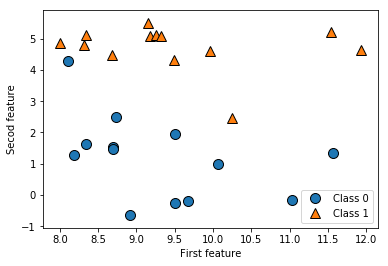

In [2]:
X,y=mglearn.datasets.make_forge()
#数据集绘图
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc= 4)
plt.xlabel("First feature")
plt.ylabel("Secod feature")
print('X.shape:{}'.format(X.shape))

Text(0, 0.5, 'Target')

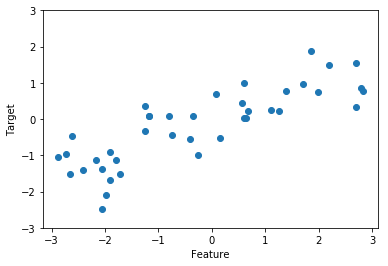

In [3]:
X,y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,"o")
plt.ylim(-3,3)
plt.xlabel('Feature')
plt.ylabel('Target')

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print('cancer.keys():\n{}'.format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print('Shape of cancer data:{}'.format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [6]:
print('Sample counts per class:\n{}'.format({n:v for n ,v in zip(cancer.target_names,np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [7]:
print('Feature names:\n{}'.format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [8]:
print('Feature descr:\n{}'.format(cancer.DESCR))

Feature descr:
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print('Data shape:{}'.format(boston.data.shape))

Data shape:(506, 13)


In [10]:
print('Data descr:\n{}'.format(boston.DESCR))

Data descr:
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        -

In [11]:
X,y = mglearn.datasets.load_extended_boston()
print('X.shape:{}'.format(X.shape))

X.shape:(506, 104)


c:\users\yuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


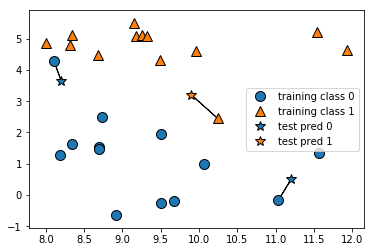

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

c:\users\yuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


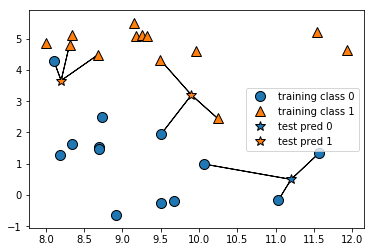

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#左上角的五角星颜色发生了变化

In [14]:
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

c:\users\yuan\appdata\local\programs\python\python36\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
clf.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
print('Test set predictions:{}'.format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [18]:
print('Test set accuracy:{:.2f}'.format(clf.score(X_test,y_test)))

Test set accuracy:0.86


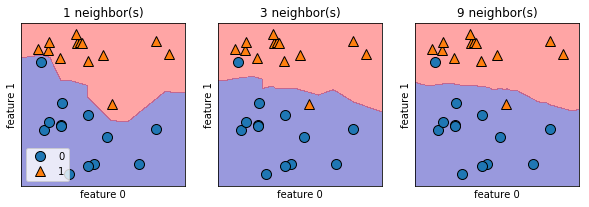

In [19]:
fig,axes = plt.subplots(1,3,figsize=(10,3))
for n_neighbors,ax in zip([1,3,9],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill =True,eps = 0.5,ax= ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title('{} neighbor(s)'.format(n_neighbors))
    ax.set_xlabel('feature 0')
    ax.set_ylabel('feature 1')
axes[0].legend(loc=3)

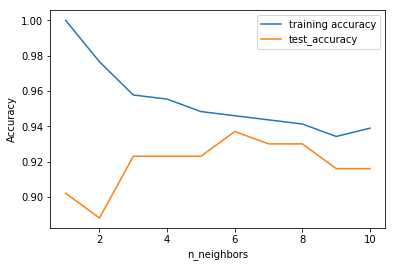

In [21]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=66)
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #构建模型
    clf = KNeighborsClassifier(n_neighbors= n_neighbors)
    clf.fit(X_train,y_train)
    #记录训练集精度
    training_accuracy.append(clf.score(X_train,y_train))
    #记录泛化精度
    test_accuracy.append(clf.score(X_test,y_test))
plt.plot(neighbors_settings,training_accuracy,label= 'training accuracy')
plt.plot(neighbors_settings,test_accuracy,label='test_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()

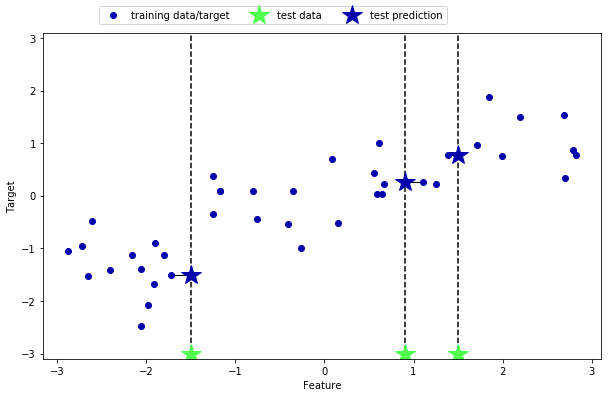

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

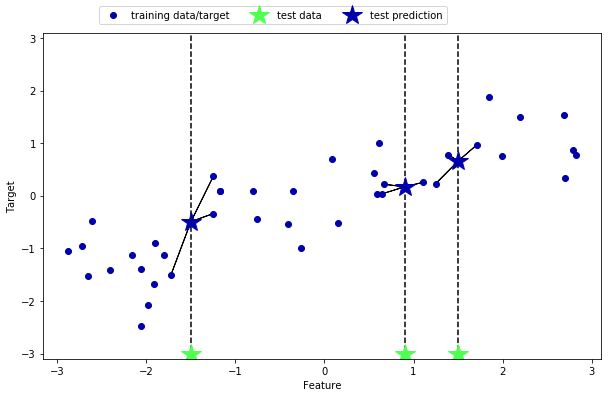

In [24]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [26]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
#将wave数据集分为训练集和测试集
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
#模型实例化，并将邻居个数设为3
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [30]:
print('Test set predictions:\n{}'.format(reg.predict(X_test)))

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [33]:
print('Test set R^2:{:.2f}'.format(reg.score(X_test,y_test)))

Test set R^2:0.83


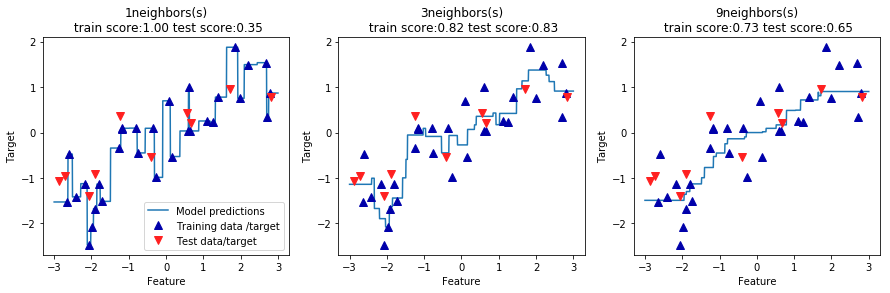

In [68]:
fig,axes = plt.subplots(1,3,figsize=(15,4))
#创建1000个数据点，在-3和3之间均匀分布
line = np.linspace(-3,3,1000).reshape(-1,1)
for n_neighbors,ax in zip([1,3,9],axes):
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train,y_train)
    ax.plot(line,reg.predict(line))
    ax.plot(X_train,y_train ,'^',c=mglearn.cm2(0),markersize = 8)
    ax.plot(X_test,y_test,'v',c= mglearn.cm2(1),markersize = 8)
    ax.set_title(
    '{}neighbors(s)\n train score:{:.2f} test score:{:.2f}'.format(
    n_neighbors,reg.score(X_train,y_train),reg.score(X_test,y_test)))
    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
axes[0].legend(['Model predictions',"Training data /target",'Test data/target'],loc ='best')

w[0]: 0.393906  b: -0.031804


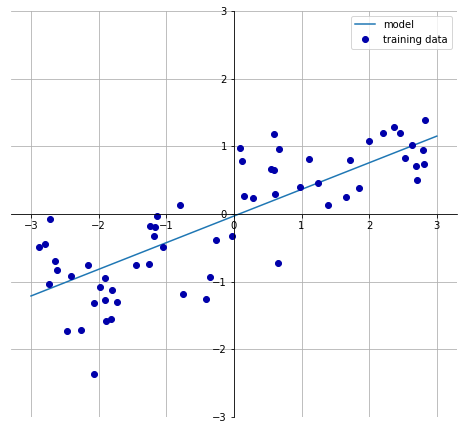

In [69]:
mglearn.plots.plot_linear_regression_wave()



In [70]:
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)
lr= LinearRegression().fit(X_train,y_train)

In [71]:
print('lr.coef_:{}'.format(lr.coef_))
print('lr.intercept_:{}'.format(lr.intercept_))

lr.coef_:[0.39390555]
lr.intercept_:-0.031804343026759746


In [72]:
print('Training set score:{:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test,y_test)))

Training set score:0.67
Test set score:0.66


In [73]:
#波士顿房价
X,y =mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)
lr = LinearRegression().fit(X_train,y_train)


In [74]:
print('Training set score:{:.2f}'.format(lr.score(X_train,y_train)))
print('Test set score:{:.2f}'.format(lr.score(X_test,y_test)))

Training set score:0.95
Test set score:0.61
